# Uber: Insights from City Supply and Demand Data Analytics Project

In this Uber dataset, we find the date when the data was gathered, the local time (24 hours), the number of people who opened the app (eyeballs), the number of people who did not see any cars (zeroes), the number of completed trips, the number of rides requested, as well as the number of unique drivers available at the hour. I hope to answer a few potential business questions using this given dataset. This dataset takes place over a two week period. 

In the first step, we import the data set, and clean it up for our analysis.

In [3]:
# import csv file into pandas 
import pandas as pd

df = pd.read_csv('dataset_1.csv')

print(df)

          Date  Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
0    10-Sep-12             7          5        0                 2          2   
1          NaN             8          6        0                 2          2   
2          NaN             9          8        3                 0          0   
3          NaN            10          9        2                 0          1   
4          NaN            11         11        1                 4          4   
..         ...           ...        ...      ...               ...        ...   
331        NaN             2          3        3                 0          2   
332        NaN             3          3        3                 0          1   
333        NaN             4          1        1                 0          0   
334        NaN             5          4        2                 1          1   
335        NaN             6          9        1                 2          2   

     Unique Drivers  
0    

In [4]:
# The date column is mostly NaN because the previous date is the date for every value. We replace the null values with the proper date.
df = df.fillna(method='ffill')

# renaming columns to make them more sql friendly
df = df.rename(columns={
      'Date':'date'
    , 'Time (Local)':'time'
    , 'Eyeballs ':'eyeballs'
    , 'Zeroes ':'zeroes'
    , 'Completed Trips ':'completed_trips'
    , 'Requests ':'requests'
    , 'Unique Drivers':'unique_drivers'})

# confirming we have non null values as well as the type of values we have in each column. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             336 non-null    object
 1   time             336 non-null    int64 
 2   eyeballs         336 non-null    int64 
 3   zeroes           336 non-null    int64 
 4   completed_trips  336 non-null    int64 
 5   requests         336 non-null    int64 
 6   unique_drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [5]:
# pandasql let's me run sql queries in python.
pip install pandasql

from pandasql import sqldf


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Question 1: Which date had the most completed trips during the two week period?

In [7]:
pysqldf = sqldf(
    "SELECT date, SUM(completed_trips) AS total_trips FROM df GROUP BY date ORDER BY total_trips DESC;")

print(pysqldf)

         date  total_trips
0   22-Sep-12          248
1   15-Sep-12          199
2   21-Sep-12          190
3   23-Sep-12          111
4   14-Sep-12          108
5   16-Sep-12           93
6   12-Sep-12           91
7   20-Sep-12           70
8   17-Sep-12           57
9   13-Sep-12           45
10  18-Sep-12           42
11  19-Sep-12           41
12  11-Sep-12           40
13  10-Sep-12           26
14  24-Sep-12            4


The date with the most completed trips is September 22, 2012 with 248 completed trips. 

### Question 2: What was the highest number of completed trips within a 24 hour period?

In [8]:
col = [] # list to store our results.
# for every row, we will add the number of completed trips from the next 23 rows to the current row.
for r in range(0,len(df)):
    trips = 0
    for i in range(0,24):
        # if the row is out of range, then we stop the forloop.
        if (r+i > len(df)-1):
            trips += 0
            break;
        trips += df._get_value(index=r+i, col='completed_trips')
    col.append(trips)
df['trips_twentyfour'] = col
print(df)


          date  time  eyeballs  zeroes  completed_trips  requests  \
0    10-Sep-12     7         5       0                2         2   
1    10-Sep-12     8         6       0                2         2   
2    10-Sep-12     9         8       3                0         0   
3    10-Sep-12    10         9       2                0         1   
4    10-Sep-12    11        11       1                4         4   
..         ...   ...       ...     ...              ...       ...   
331  24-Sep-12     2         3       3                0         2   
332  24-Sep-12     3         3       3                0         1   
333  24-Sep-12     4         1       1                0         0   
334  24-Sep-12     5         4       2                1         1   
335  24-Sep-12     6         9       1                2         2   

     unique_drivers  trips_twentyfour  
0                 9                29  
1                14                29  
2                14                27  
3          

In [10]:
pysqldf = sqldf(
    "SELECT date, time, trips_twentyfour FROM df ORDER BY trips_twentyfour DESC;")

print(pysqldf)

          date  time  trips_twentyfour
0    21-Sep-12    17               278
1    21-Sep-12    16               274
2    21-Sep-12    20               261
3    21-Sep-12    15               260
4    21-Sep-12    18               260
..         ...   ...               ...
331  24-Sep-12     2                 3
332  24-Sep-12     3                 3
333  24-Sep-12     4                 3
334  24-Sep-12     5                 3
335  24-Sep-12     6                 2

[336 rows x 3 columns]


The most amount of completed trips in the past 24 hours was 278 trips made between September 21, 2012 5PM to September 22, 2012 5PM. 

### Question 3: Which hour of the day had the most requests during the two week period?

In [11]:
pysqldf = sqldf(
    "SELECT time, SUM(requests) AS total_requests FROM df GROUP BY time ORDER BY total_requests DESC;"
)
print(pysqldf)

    time  total_requests
0     23             184
1     22             174
2     19             156
3      0             142
4     18             119
5     21             112
6     20             107
7      2             100
8     17              98
9      1              96
10    16              82
11    15              71
12    14              71
13    13              55
14    12              53
15    11              47
16     3              35
17     8              29
18    10              28
19     6              28
20     9              26
21     7              22
22     5              14
23     4               9


The 23rd hour of the day, or 11PM, has the most requests during the two week period. 

#### Question 4: What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

In [12]:
pd.to_datetime(df['date'])
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
print(df)

          date  time  eyeballs  zeroes  completed_trips  requests  \
0    10-Sep-12     7         5       0                2         2   
1    10-Sep-12     8         6       0                2         2   
2    10-Sep-12     9         8       3                0         0   
3    10-Sep-12    10         9       2                0         1   
4    10-Sep-12    11        11       1                4         4   
..         ...   ...       ...     ...              ...       ...   
331  24-Sep-12     2         3       3                0         2   
332  24-Sep-12     3         3       3                0         1   
333  24-Sep-12     4         1       1                0         0   
334  24-Sep-12     5         4       2                1         1   
335  24-Sep-12     6         9       1                2         2   

     unique_drivers  trips_twentyfour day_of_week  
0                 9                29      Monday  
1                14                29      Monday  
2              

In [13]:
# sum of zeros between friday at time 5 to sunday at time 4
weekend_zeroes = 0
for row in range(0, len(df)):
    if (df._get_value(index=row, col='day_of_week') == 'Friday' and df._get_value(index=row, col='time') >= 17):
        weekend_zeroes += df._get_value(index=row, col='zeroes')
    elif (df._get_value(index=row, col='day_of_week') == 'Saturday'):
        weekend_zeroes += df._get_value(index=row, col='zeroes')
    elif (df._get_value(index=row, col='day_of_week') == 'Sunday' and df._get_value(index=row, col='time') < 3):
        weekend_zeroes += df._get_value(index=row, col='zeroes')
print(weekend_zeroes)

# sum of zeroes total
total_zeroes = df['zeroes'].sum()
print(total_zeroes)

# find percentage
print(weekend_zeroes*100.0/total_zeroes)

641
1429
44.856543037088876


About 49.41% of all zeroes occured over the weekend. 

#### Question 5: What is the weighted average ratio of completed trips per driver during the two week period?

In [14]:
import numpy as np

# completed trips / number of drivers = average trips per driver
df['average_trips'] = df['completed_trips']/df['unique_drivers']
df.replace([np.inf, -np.inf], 0, inplace=True)

# average trips per driver / total rows = weighted average
df['average_trips'].mean()


0.47274804343978094

The weighted average ratio of completed trips per driver is about 0.47 completed trips per driver. 

#### Question 6: In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests, if a new shift begins every 8 hours?

In [15]:
# we create a function for a timestamp column to use for resampling the dataset. 
def create_timestamp(date, time):
    return pd.to_datetime(f"{date} {time}:00")
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['date'], row['time']), axis=1)

df_eight_hr_shift = df.set_index('Timestamp').resample('8H').sum()
print(df_eight_hr_shift)

                     time  eyeballs  zeroes  completed_trips  requests  \
Timestamp                                                                
2012-09-10 00:00:00     7         5       0                2         2   
2012-09-10 08:00:00    92        78      10                9        11   
2012-09-10 16:00:00   156       106      16               15        21   
2012-09-11 00:00:00    28        33      12                5         7   
2012-09-11 08:00:00    92       108      11                5         6   
2012-09-11 16:00:00   156       173      41               30        39   
2012-09-12 00:00:00    28        39      16                6        13   
2012-09-12 08:00:00    92       213      15               52        60   
2012-09-12 16:00:00   156       171      24               33        41   
2012-09-13 00:00:00    28        40      28                3        12   
2012-09-13 08:00:00    92       117      30               14        18   
2012-09-13 16:00:00   156       168   

/var/folders/bt/vmz2h6t112j7lvw7v2yshbmw0000gn/T/ipykernel_19385/2149298167.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_eight_hr_shift = df.set_index('Timestamp').resample('8H').sum()


In [16]:
pysqldf = sqldf(
    "SELECT Timestamp, requests FROM df_eight_hr_shift ORDER BY requests DESC LIMIT 1;")

print(pysqldf)

                    Timestamp  requests
0  2012-09-21 16:00:00.000000       192


The busiest 8 hour shift in the two week period was September 21, 2012 from 4PM to September 22, 2012 12AM with 192 requests.

#### Question 7: Does the driver supply always increases when demand increases during the two week period?

In [36]:
# we should always see the supply increase when the demand increases. 
df_change = pd.DataFrame(df['Timestamp'])
# calculate change in supply
df_change['supply'] = df['unique_drivers'].shift(-1)-df['unique_drivers']

# calculate change in demand
df_change['demand'] = df['requests'].shift(-1)-df['requests']

df_change

,Timestamp,supply,demand
0,2012-09-10 07:00:00,5.0,0.0
1,2012-09-10 08:00:00,0.0,-2.0
2,2012-09-10 09:00:00,0.0,1.0
3,2012-09-10 10:00:00,-3.0,3.0
4,2012-09-10 11:00:00,0.0,-2.0
...,...,...,...
331,2012-09-24 02:00:00,0.0,-1.0
332,2012-09-24 03:00:00,0.0,-1.0
333,2012-09-24 04:00:00,3.0,1.0
334,2012-09-24 05:00:00,4.0,1.0


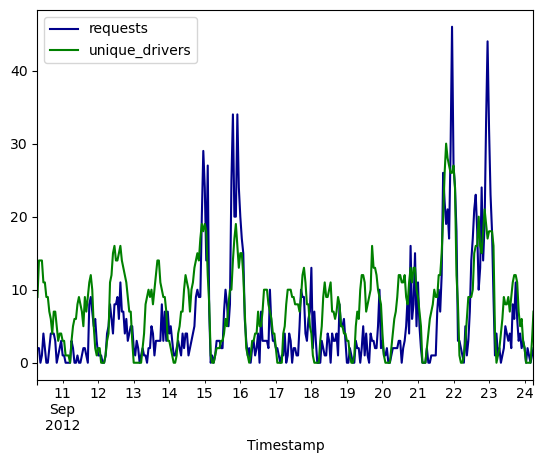

In [173]:
ax1 = df.plot(x='Timestamp', y='requests', c='DarkBlue')
ax2 = df.plot(x='Timestamp', y='unique_drivers', c='Green', ax=ax1)

Numerically, no. When we look at the change in supply and demand, we should see a sign correlation between both columns. Looking at the first three columns, we see no change in the number of drivers while the change in requests fluctuates. However, when looking at the plot, we find that generally, the green peaks (unique_drivers) occur simultaneously or after the blue peaks (requests) occur. So even if it's not an immediate change within the hour, the two seem to be correlated. 

#### Question 8: In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [179]:
col = [] # list to store our results.
# for every row, we will add the number of completed trips from the next 23 rows to the current row.
for r in range(0,len(df)):
    total_zeroes = 0
    total_eyes = 0
    ratio = 0
    for i in range(0,72):
        # if the row is out of range, then we stop the forloop.
        if (r+i > len(df)-1):
            total_zeroes = 0
            break;
        total_zeroes += df._get_value(index=r+i, col='zeroes')
        total_eyes += df._get_value(index=r+i, col='eyeballs')
    ratio = total_zeroes/total_eyes
    col.append(ratio)
df['zeroes_to_eyes_ratio'] = col
print(df)

          date  time  eyeballs  zeroes  completed_trips  requests  \
0    10-Sep-12     7         5       0                2         2   
1    10-Sep-12     8         6       0                2         2   
2    10-Sep-12     9         8       3                0         0   
3    10-Sep-12    10         9       2                0         1   
4    10-Sep-12    11        11       1                4         4   
..         ...   ...       ...     ...              ...       ...   
331  24-Sep-12     2         3       3                0         2   
332  24-Sep-12     3         3       3                0         1   
333  24-Sep-12     4         1       1                0         0   
334  24-Sep-12     5         4       2                1         1   
335  24-Sep-12     6         9       1                2         2   

     unique_drivers  trips_twentyfour day_of_week  average_trips  \
0                 9                29      Monday       0.222222   
1                14                

In [180]:
pysqldf = sqldf('SELECT date, time, zeroes_to_eyes_ratio FROM df ORDER BY zeroes_to_eyes_ratio DESC LIMIT 1')

print(pysqldf)

        date  time  zeroes_to_eyes_ratio
0  15-Sep-12     5              0.292977


The 72 hour time period with the highest zeroes to eyes ratio begins on September 15 5AM and goes until Septemeber 18 5AM. 

#### Question 9: If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [189]:
pysqldf = sqldf('SELECT time, AVG(eyeballs/unique_drivers) AS eyes_to_drivers_ratio FROM df GROUP BY time ORDER BY eyes_to_drivers_ratio DESC')

print(pysqldf)

    time  eyes_to_drivers_ratio
0     23               4.428571
1     22               3.642857
2      0               3.153846
3      4               3.000000
4     21               2.857143
5     13               2.500000
6      7               2.500000
7      5               2.500000
8     14               2.285714
9      2               2.250000
10    20               2.214286
11    10               2.214286
12    17               2.142857
13     1               2.090909
14    15               2.071429
15    19               2.000000
16    18               2.000000
17    16               2.000000
18    12               2.000000
19     6               2.000000
20    11               1.928571
21     9               1.928571
22     8               1.714286
23     3               1.400000


At 11PM, the ratio between the number of eyes to drivers is the highest. This means that there are many people looking for rides, but the number of drivers is insufficient. Adding 5 drivers to 11PM would probably result in more business. 

#### Question 10: Looking at the data from all two weeks, which time might make the most sense to consider a true "end of day" instead of midnight? (i.e when are supply and demand at both their natural minimums) Tip: Visualize the data to confirm your answer if needed. 

      unique_drivers  requests
time                          
0                NaN       NaN
1                NaN       NaN
2                NaN       NaN
3                NaN       NaN
4           0.642857  0.642857
5                NaN       NaN
6                NaN       NaN
7                NaN       NaN
8                NaN       NaN
9                NaN       NaN
10               NaN       NaN
11               NaN       NaN
12               NaN       NaN
13               NaN       NaN
14               NaN       NaN
15               NaN       NaN
16               NaN       NaN
17               NaN       NaN
18               NaN       NaN
19               NaN       NaN
20               NaN       NaN
21               NaN       NaN
22               NaN       NaN
23               NaN       NaN


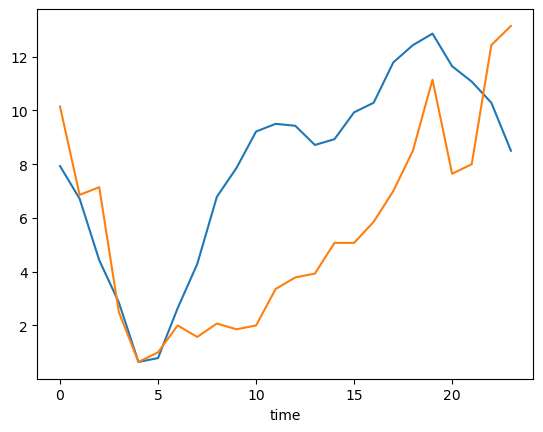

In [25]:
# at each time value, find the average value.
df_supply = df.groupby('time')['unique_drivers'].mean()
df_demand = df.groupby('time')['requests'].mean()

df_supply_demand = pd.merge(df_supply, df_demand, on='time')
print(df_supply_demand[df_supply_demand == df_supply_demand.min()])

# plot the supply and demand on a line plot and determine the minimum value
ax1 = df_supply.plot(x='time', y='unique_drivers')
ax2 = df_demand.plot(x='time', y='requests', ax=ax1)

The average minimum number of requests and demands occur at 4AM. The true "end of day" would be at 4AM. 